In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
base_dir = Path("/home/yizi/decode-brain-wide-map/results")

In [99]:
regions = {
    "cerebellum": {"DEC": {}, "SIM": {}, "ANcr1": {}},
    "hippocampus": {"CA1": {}, "CA2": {}, "CA3": {}},
    "visual": {"VISa": {}, "VISp": {}, "LGd": {}},
    "motor": {"GRN": {}, "MOp": {}, "MOs": {}}
}

In [100]:
from scipy.linalg import svd

for region in regions:
    for sub_roi in regions[region]:
        eids = os.listdir(base_dir/sub_roi)
        for eid in eids:
            if not eid.endswith(".ipynb_checkpoints"):
                path = base_dir/sub_roi/eid
                res = np.load(
                        path/"stimOn_times_-0.5_1.5_0.05_all_units.npy", allow_pickle=True
                    ).item()[eid]["UV"]
                U, V = res
                W = U @ V.T
                svd_U, S, svd_V = svd(W)
                regions[region][sub_roi].update(
                    {eid: (np.diag(S[:2]) @ svd_V[:2, :]).T}
                )

In [101]:
%matplotlib inline
plt.rc("figure", dpi=200)
SMALL_SIZE = 8
BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=.5)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=1)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 10

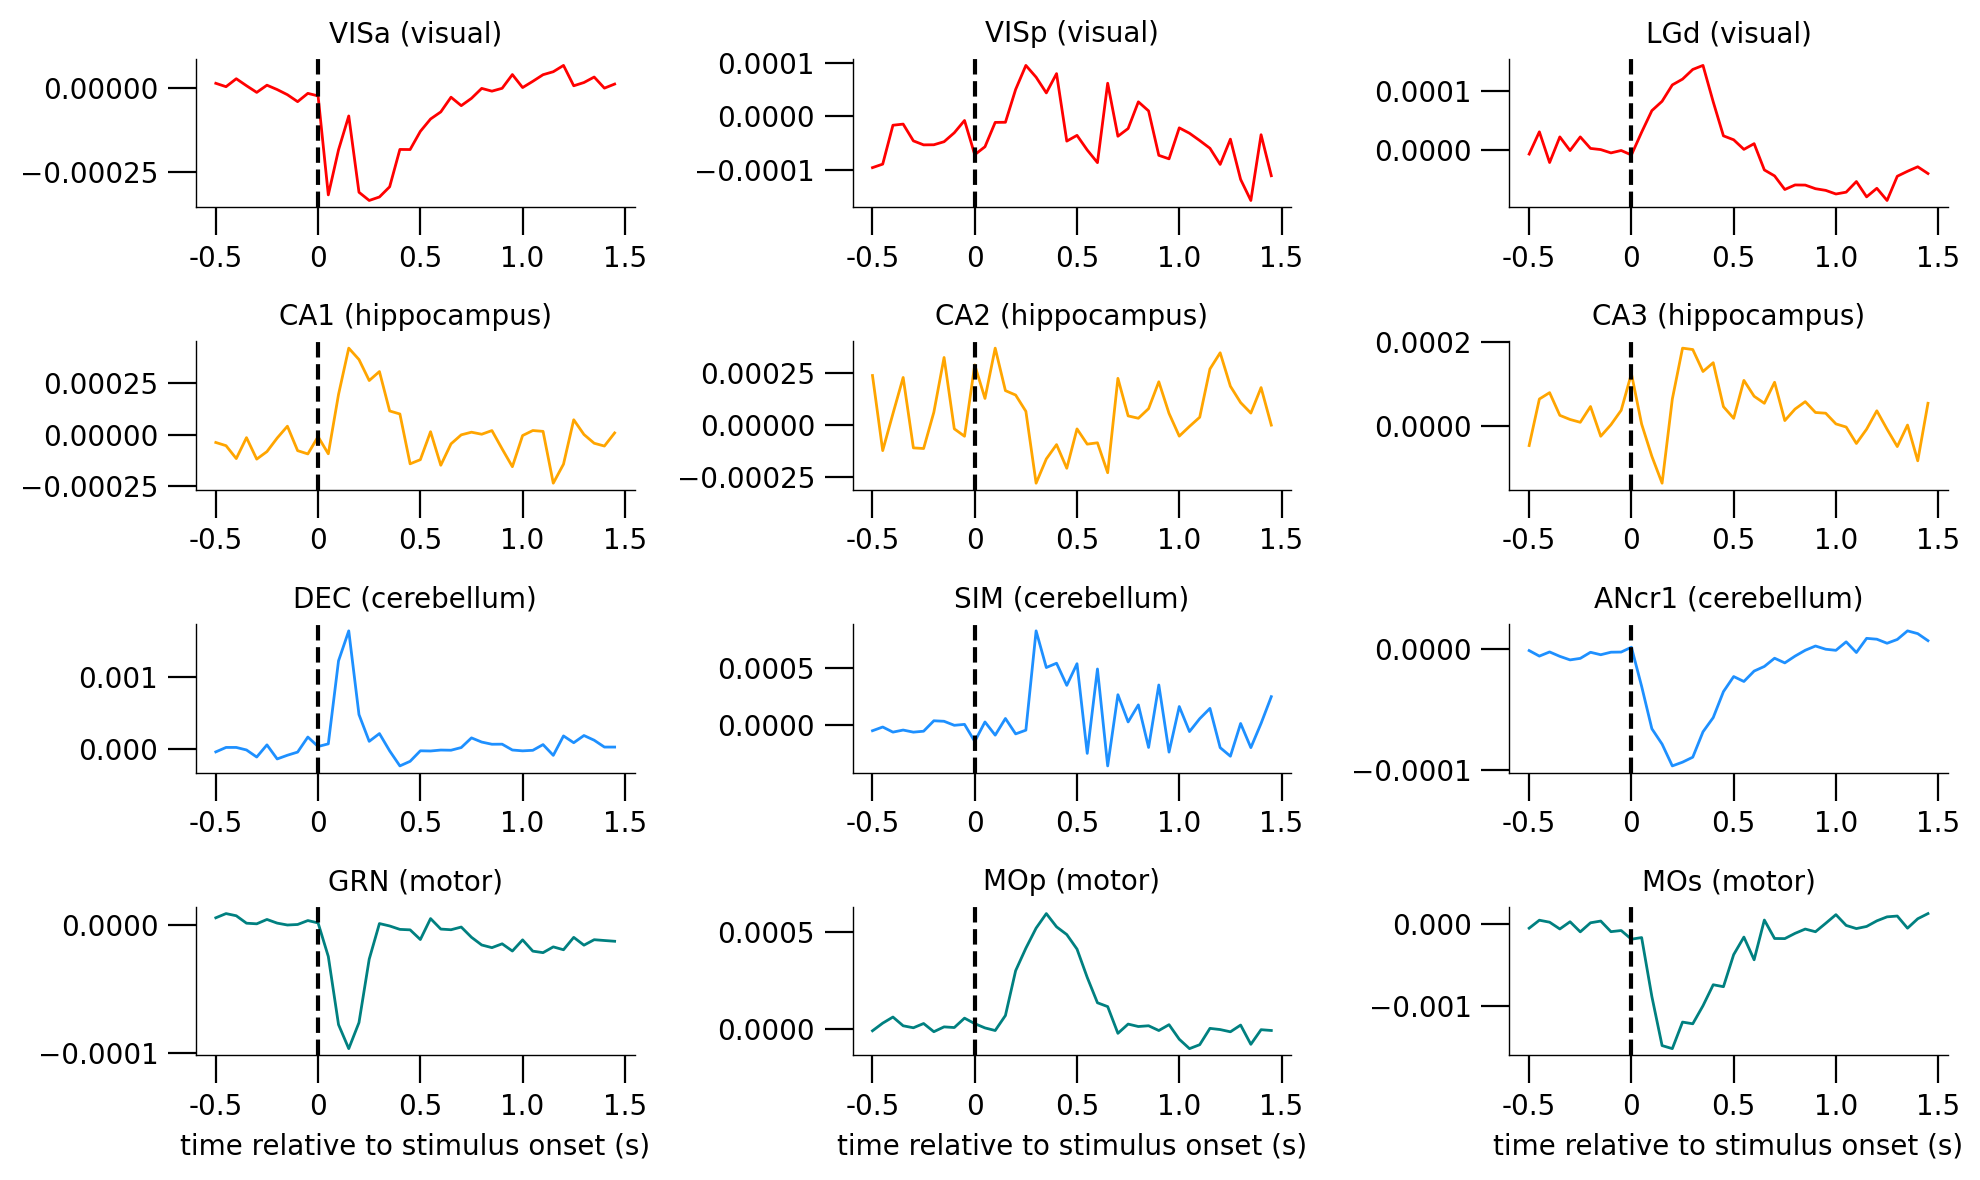

In [108]:
from matplotlib.ticker import FormatStrFormatter

colors = ["red", "orange", "dodgerblue", "teal"]

fig, axes = plt.subplots(4, 3, figsize=(10, 6))
for region in regions: 
    if region == "visual":
        i = 0
    elif region == "hippocampus":
        i = 1
    elif region == "cerebellum":
        i = 2
    else:
        i = 3
    for j, sub_roi in enumerate(regions[region]):
        res = np.array(list(regions[region][sub_roi].values())).mean(0)
        axes[i,j].plot(res.T[0], c=colors[i], linewidth=1.)
        axes[i,j].axvline(10, color="k", linestyle="--")
        axes[i,j].set_title(f"{sub_roi} ({region})")
        axes[i,j].set_xticks([0,10,20,30,40], [-0.5, 0, 0.5, 1.0, 1.5])
        if i == 3:
            axes[i,j].set_xlabel("time relative to stimulus onset (s)")
        axes[i,j].spines[['right', 'top']].set_visible(False)
        # axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
# plt.savefig("brainwide_timescales.png", dpi=200)
plt.show()